In [1]:
# Importing main libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Importing csv

cars = pd.read_csv('cars_cleaned.csv')

In [3]:
cars.describe()

km_driven      mileage       engine    max_power        seats  \
count  7906.000000  7906.000000  7906.000000  7906.000000  7906.000000   
mean     69.188660    19.419861     1.458709    91.587374     5.416393   
std      56.792296     4.036263     0.503893    35.747216     0.959208   
min       0.001000     0.000000     0.624000    32.800000     2.000000   
25%      35.000000    16.780000     1.197000    68.050000     5.000000   
50%      60.000000    19.300000     1.248000    82.000000     5.000000   
75%      95.425000    22.320000     1.582000   102.000000     5.000000   
max    2360.457000    42.000000     3.604000   400.000000    14.000000   

           car_age        price  
count  7906.000000  7906.000000  
mean      6.016064     6.498137  
std       3.863695     8.135827  
min       0.000000     0.299990  
25%       3.000000     2.700000  
50%       5.000000     4.500000  
75%       8.000000     6.900000  
max      26.000000   100.000000

/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


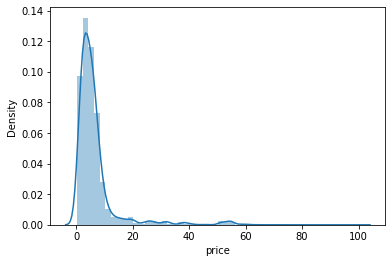

In [4]:
sns.distplot(cars['price'])

/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


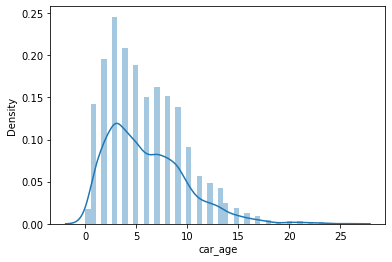

In [5]:
sns.distplot(cars['car_age'])

/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


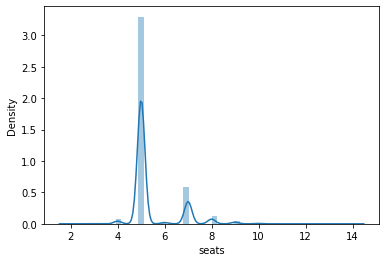

In [6]:
sns.distplot(cars['seats'])

### There are outliers in the respective features: 

- price
- car_age
- seats

# Excluding the outliers for price
### filtering price >= 15

In [7]:
normal = cars[cars['price'] < 15]
normal

km_driven    fuel seller_type transmission         owner  mileage  \
0         145.5  Diesel  Individual       Manual   First_Owner    23.40   
1         120.0  Diesel  Individual       Manual  Second_Owner    21.14   
2         140.0  Petrol  Individual       Manual   >Two_Owners    17.70   
3         127.0  Diesel  Individual       Manual   First_Owner    23.00   
4         120.0  Petrol  Individual       Manual   First_Owner    16.10   
...         ...     ...         ...          ...           ...      ...   
7901      110.0  Petrol  Individual       Manual   First_Owner    18.50   
7902      119.0  Diesel  Individual       Manual   >Two_Owners    16.80   
7903      120.0  Diesel  Individual       Manual   First_Owner    19.30   
7904       25.0  Diesel  Individual       Manual   First_Owner    23.57   
7905       25.0  Diesel  Individual       Manual   First_Owner    23.57   

      engine  max_power  seats      car_brand  car_age  price  
0      1.248      74.00    5.0       Domestic        6   4.50  
1      1.498     103.52    5.0  International        6   3.70  
2      1.497      78.00    5.0  International       14   1.58  
3      1.396      90.00    5.0  International       10   2.25  
4      1.298      88.20    5.0       Domestic       13   1.30  
...      ...        ...    ...            ...      ...    ...  
7901   1.197      82.85    5.0  International        7   3.20  
7902   1.493     110.00    5.0  International       13   1.35  
7903   1.248      73.90    5.0       Domestic       11   3.82  
7904   1.396      70.00    5.0       Domestic        7   2.90  
7905   1.396      70.00    5.0       Domestic        7   2.90  

[7363 rows x 12 columns]

In [8]:
normal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7363 entries, 0 to 7905
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   km_driven     7363 non-null   float64
 1   fuel          7363 non-null   object 
 2   seller_type   7363 non-null   object 
 3   transmission  7363 non-null   object 
 4   owner         7363 non-null   object 
 5   mileage       7363 non-null   float64
 6   engine        7363 non-null   float64
 7   max_power     7363 non-null   float64
 8   seats         7363 non-null   float64
 9   car_brand     7363 non-null   object 
 10  car_age       7363 non-null   int64  
 11  price         7363 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 747.8+ KB


## Scaled Features

### Creating a copy of DF

In [9]:
scaled_features = normal.copy()

### Selecting the columns to be used 

In [10]:
col_names = ['km_driven','engine', 'max_power', 'price', 'car_age', 'seats']

### Importing the libraries

In [11]:
from sklearn.preprocessing import StandardScaler
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)



### Checking the results

In [12]:
scaled_features[col_names] = features
print(scaled_features)

      km_driven    fuel seller_type transmission         owner  mileage  \
0      1.282496  Diesel  Individual       Manual   First_Owner    23.40   
1      0.838955  Diesel  Individual       Manual  Second_Owner    21.14   
2      1.186830  Petrol  Individual       Manual   >Two_Owners    17.70   
3      0.960711  Diesel  Individual       Manual   First_Owner    23.00   
4      0.838955  Petrol  Individual       Manual   First_Owner    16.10   
...         ...     ...         ...          ...           ...      ...   
7901   0.665017  Petrol  Individual       Manual   First_Owner    18.50   
7902   0.821561  Diesel  Individual       Manual   >Two_Owners    16.80   
7903   0.838955  Diesel  Individual       Manual   First_Owner    19.30   
7904  -0.813451  Diesel  Individual       Manual   First_Owner    23.57   
7905  -0.813451  Diesel  Individual       Manual   First_Owner    23.57   

        engine  max_power     seats      car_brand   car_age     price  
0    -0.331907  -0.424078 

# Price distribution

### After the normalization

/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


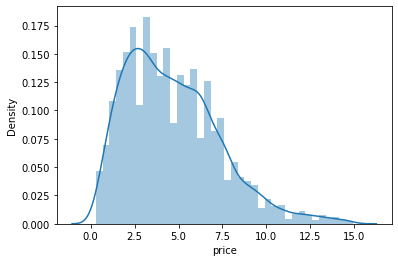

In [13]:
sns.distplot(normal['price'])

In [14]:
# Checking

normal.describe()

km_driven      mileage       engine    max_power        seats  \
count  7363.000000  7363.000000  7363.000000  7363.000000  7363.000000   
mean     71.766870    19.646818     1.400844    85.036798     5.413962   
std      57.495821     3.973395     0.460533    26.027138     0.963067   
min       0.001000     0.000000     0.624000    32.800000     2.000000   
25%      35.000000    17.000000     1.197000    68.000000     5.000000   
50%      65.000000    19.700000     1.248000    81.830000     5.000000   
75%     100.000000    22.540000     1.498000    98.600000     5.000000   
max    2360.457000    33.440000     3.498000   272.000000    14.000000   

           car_age        price  
count  7363.000000  7363.000000  
mean      6.262800     4.669032  
std       3.861471     2.687024  
min       0.000000     0.299990  
25%       3.000000     2.500000  
50%       6.000000     4.300000  
75%       9.000000     6.300000  
max      26.000000    14.900000

In [15]:
# Excluding seat > 10 and == 2

normal['seats'].value_counts().sort_values(ascending = False)

5.0     5840
7.0     1013
8.0      222
4.0      124
9.0       80
6.0       62
10.0      19
2.0        2
14.0       1
Name: seats, dtype: int64

In [16]:
normal.drop(normal[normal['seats'] > 10].index, inplace=True)
normal.drop(normal[normal['seats'] == 2].index, inplace=True)

/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


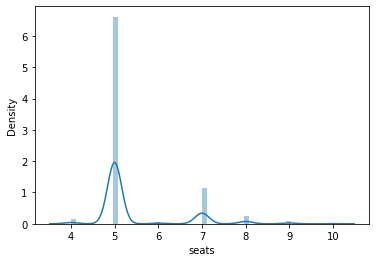

In [17]:
# Distribution

sns.distplot(normal['seats'])

In [18]:
# Excluding car_age > 20

normal['car_age'].value_counts().sort_values(ascending = False)

3     887
4     777
5     752
2     703
7     654
8     618
6     604
9     565
1     421
10    372
11    231
12    201
13    173
14    102
15     76
0      59
16     51
17     37
18     19
20     15
21     14
23      9
22      9
19      6
26      2
24      2
25      1
Name: car_age, dtype: int64

In [19]:
normal.drop(normal[normal['car_age'] > 20].index, inplace=True)

/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Dummies variables

In [20]:
# Naming a new dataset to create dummies

normal_dummy = pd.get_dummies(scaled_features, columns= ['seller_type', 'fuel', 'transmission', 
                                            'owner','car_brand'], drop_first = True)
normal_dummy

km_driven  mileage    engine  max_power     seats   car_age     price  \
0      1.282496    23.40 -0.331907  -0.424078 -0.429866 -0.068062 -0.062911   
1      0.838955    21.14  0.210979   0.710199 -0.429866 -0.068062 -0.360658   
2      1.186830    17.70  0.208807  -0.270382 -0.429866  2.003828 -1.149689   
3      0.960711    23.00 -0.010519   0.190706 -0.429866  0.967883 -0.900325   
4      0.838955    16.10 -0.223330   0.121543 -0.429866  1.744842 -1.253900   
...         ...      ...       ...        ...       ...       ...       ...   
7901   0.665017    18.50 -0.442656  -0.084026 -0.429866  0.190925 -0.546750   
7902   0.821561    16.80  0.200121   0.959187 -0.429866  1.744842 -1.235291   
7903   0.838955    19.30 -0.331907  -0.427921 -0.429866  1.226870 -0.315996   
7904  -0.813451    23.57 -0.010519  -0.577775 -0.429866  0.190925 -0.658406   
7905  -0.813451    23.57 -0.010519  -0.577775 -0.429866  0.190925 -0.658406   

      seller_type_Individual  fuel_Diesel  fuel_LPG  fuel_Petrol  \
0                          1            1         0            0   
1                          1            1         0            0   
2                          1            0         0            1   
3                          1            1         0            0   
4                          1            0         0            1   
...                      ...          ...       ...          ...   
7901                       1            0         0            1   
7902                       1            1         0            0   
7903                       1            1         0            0   
7904                       1            1         0            0   
7905                       1            1         0            0   

      transmission_Manual  owner_First_Owner  owner_Second_Owner  \
0                       1                  1                   0   
1                       1                  0                   1   
2                       1                  0                   0   
3                       1                  1                   0   
4                       1                  1                   0   
...                   ...                ...                 ...   
7901                    1                  1                   0   
7902                    1                  0                   0   
7903                    1                  1                   0   
7904                    1                  1                   0   
7905                    1                  1                   0   

      car_brand_International  
0                           0  
1                           1  
2                           1  
3                           1  
4                           0  
...                       ...  
7901                        1  
7902                        1  
7903                        0  
7904                        0  
7905                        0  

[7363 rows x 15 columns]

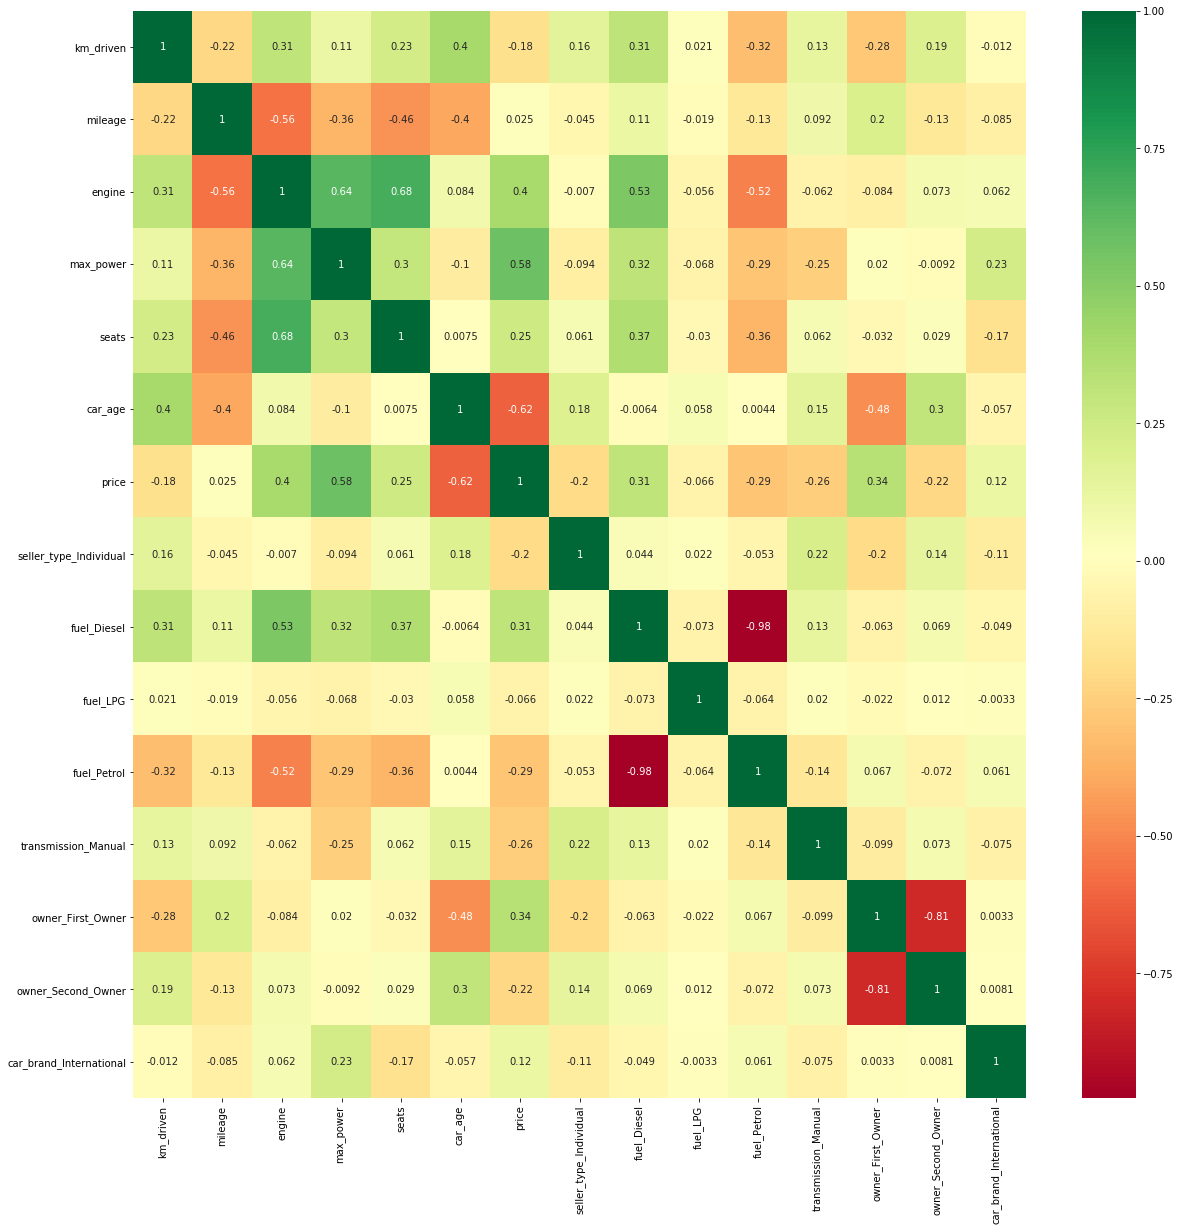

In [21]:
# Correlation heatmap

corrmat=normal_dummy.corr() 
top_corr_features=corrmat.index 
plt.figure(figsize=(20,20)) 
#plot heat map 
g=sns.heatmap(normal_dummy[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Importing all the models

- Linear Regression
- Elastic Net
- OLS 
- XG Boost
- Gradient Boosting
- Random Forest

In [22]:
# Importing models 
#from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# train test split
from sklearn.model_selection import train_test_split

# Importing metrics
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

# Cross validation score
from sklearn.model_selection import cross_val_score

# Defining X and y 

In [23]:
X = normal_dummy.drop(columns=['price'])
y = normal_dummy['price']

In [104]:
X

km_driven  mileage    engine  max_power     seats   car_age  \
0      1.282496    23.40 -0.331907  -0.424078 -0.429866 -0.068062   
1      0.838955    21.14  0.210979   0.710199 -0.429866 -0.068062   
2      1.186830    17.70  0.208807  -0.270382 -0.429866  2.003828   
3      0.960711    23.00 -0.010519   0.190706 -0.429866  0.967883   
4      0.838955    16.10 -0.223330   0.121543 -0.429866  1.744842   
...         ...      ...       ...        ...       ...       ...   
7901   0.665017    18.50 -0.442656  -0.084026 -0.429866  0.190925   
7902   0.821561    16.80  0.200121   0.959187 -0.429866  1.744842   
7903   0.838955    19.30 -0.331907  -0.427921 -0.429866  1.226870   
7904  -0.813451    23.57 -0.010519  -0.577775 -0.429866  0.190925   
7905  -0.813451    23.57 -0.010519  -0.577775 -0.429866  0.190925   

      seller_type_Individual  fuel_Diesel  fuel_LPG  fuel_Petrol  \
0                          1            1         0            0   
1                          1            1         0            0   
2                          1            0         0            1   
3                          1            1         0            0   
4                          1            0         0            1   
...                      ...          ...       ...          ...   
7901                       1            0         0            1   
7902                       1            1         0            0   
7903                       1            1         0            0   
7904                       1            1         0            0   
7905                       1            1         0            0   

      transmission_Manual  owner_First_Owner  owner_Second_Owner  \
0                       1                  1                   0   
1                       1                  0                   1   
2                       1                  0                   0   
3                       1                  1                   0   
4                       1                  1                   0   
...                   ...                ...                 ...   
7901                    1                  1                   0   
7902                    1                  0                   0   
7903                    1                  1                   0   
7904                    1                  1                   0   
7905                    1                  1                   0   

      car_brand_International  
0                           0  
1                           1  
2                           1  
3                           1  
4                           0  
...                       ...  
7901                        1  
7902                        1  
7903                        0  
7904                        0  
7905                        0  

[7363 rows x 14 columns]

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4933, 14) (4933,)
(2430, 14) (2430,)


# Train test split 

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 20% and 10%

# Linear Regression

In [107]:
# Calling the model
lm = LinearRegression()

# Fitting 
lm.fit(X_train, y_train)

# Score
lm.score(X_test,y_test)

0.6937291230858151

In [108]:
# Feature Importance using Coefficent values

np.round(lm.coef_.ravel(), 3)

array([-0.055, -0.   ,  0.105,  0.375,  0.04 , -0.506, -0.123,  0.44 ,
        0.322,  0.149, -0.282,  0.159,  0.008, -0.002])

- km_driven has a negative impact of -0.055
- mileage  0 
- engine impacts a 0.105
- max_power 0.375
- seats 0.04
- car_age -0.50
- seller_type -0.123
- fuel_diesel 0.44
- fuel_lpg 0.322
- fuel_Petro 0.149
- transmission_Manual -0.282
- owner_First_Owner 0.159
- owner_First_Owner 0.008
- car_brand_International -0.002

**Conclusion** 

car_age, fuel_lpg, fuel_Petro, transmission_Manual and owner_First_Owner have most impact in the equation


In [109]:
# Bias term in our model 
lm.intercept_

-0.027888616602295347

In [110]:
# Predictions

predictions = lm.predict(X_test)
predictions

array([-0.3956629 , -0.4136099 , -0.10727293, ..., -0.46160788,
        0.4811083 ,  0.49485732])

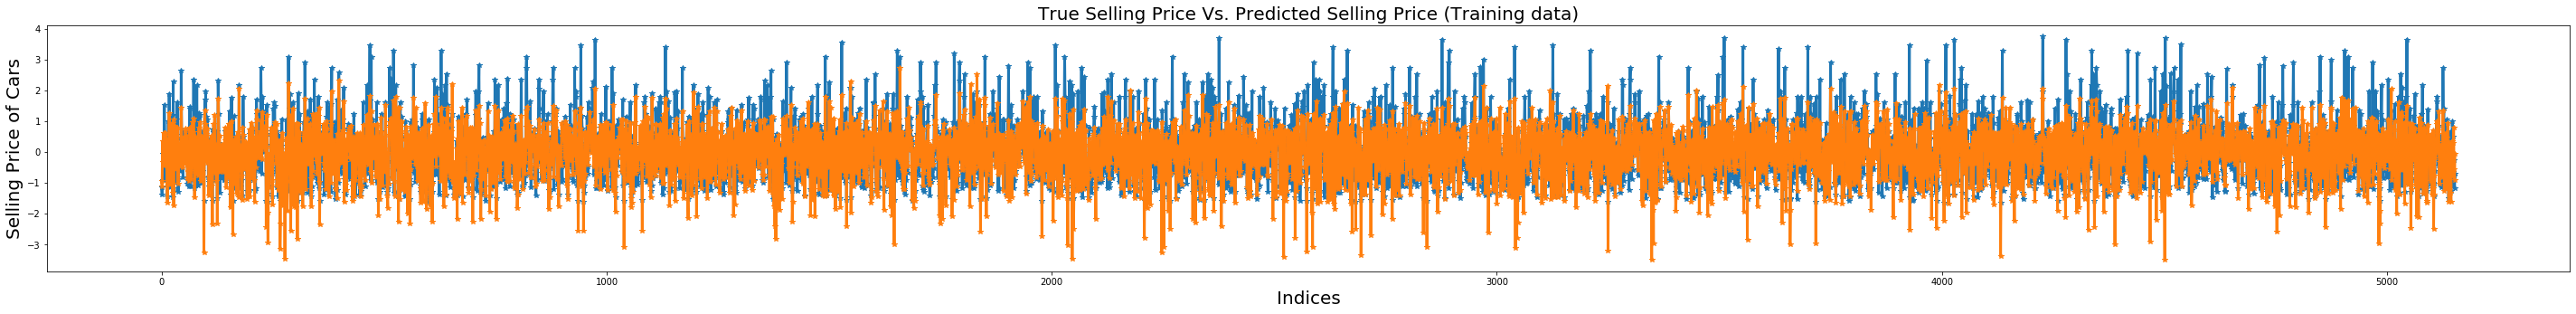

In [111]:
# For training data
plt.figure(figsize=(50, 5))
plt.plot(range(0, len(y_train)), y_train, label="TrueValues", marker="*", linewidth=3)
plt.plot(range(0, len(y_train)), lm.predict(X_train), label="PredictedValues", marker="*", linewidth=3)
plt.xlabel("Indices",fontsize=20)
plt.ylabel("Selling Price of Cars",fontsize=20)
plt.title("True Selling Price Vs. Predicted Selling Price (Training data)",fontsize=20)
plt.show()

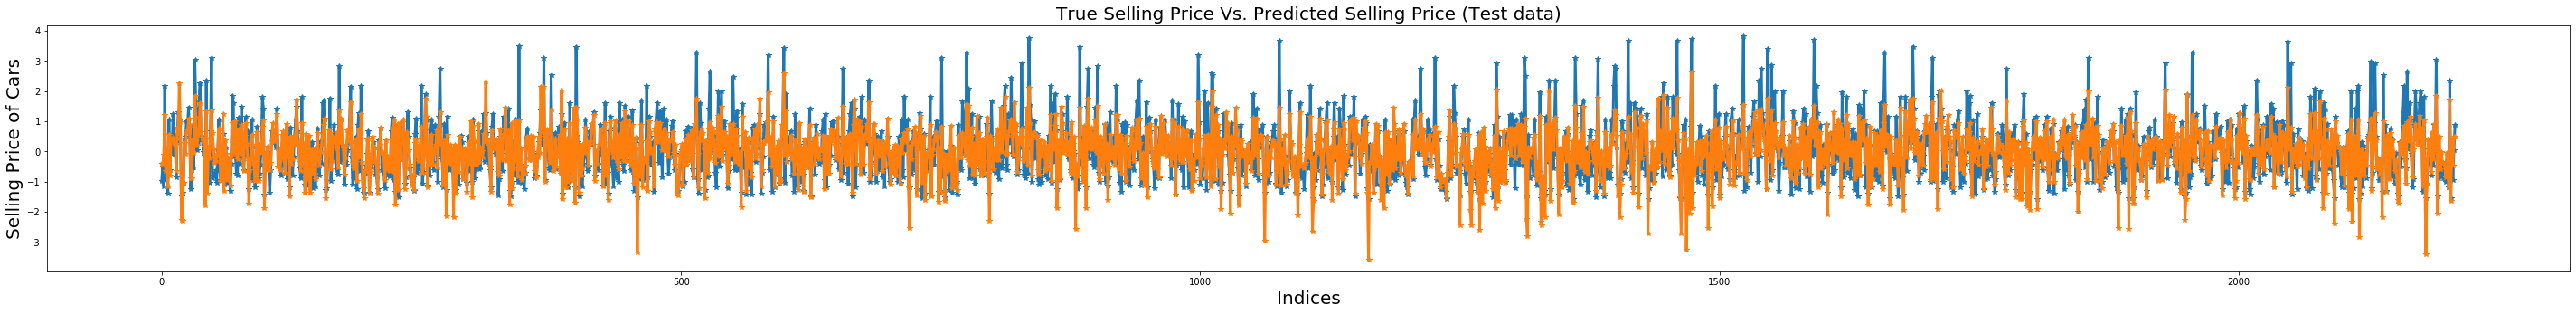

In [112]:
# For test data
plt.figure(figsize=(50, 5))
plt.plot(range(0, len(y_test)), y_test, label="TrueValues", marker="*", linewidth=3)
plt.plot(range(0, len(y_test)), lm.predict(X_test), label="PredictedValues", marker="*", linewidth=3)
plt.xlabel("Indices",fontsize=20)
plt.ylabel("Selling Price of Cars",fontsize=20)
plt.title("True Selling Price Vs. Predicted Selling Price (Test data)",fontsize=20)
plt.show()

### Scatterplot y_test vs predictions

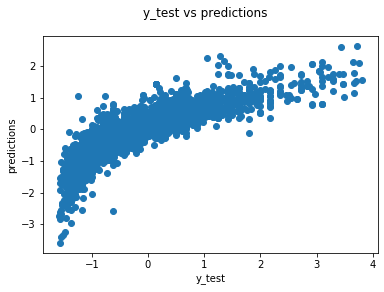

In [113]:
predictions=lm.predict(X_test)

fig=plt.figure(figsize=(6,4))
# Plot-label
fig.suptitle('y_test vs predictions')

#X-label
plt.xlabel('y_test')

# Y-label
plt.ylabel('predictions')
plt.scatter(y_test,predictions)


/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Residual Analysis')

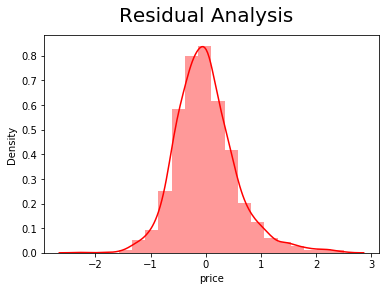

In [114]:
# Residual Analysis
# The normality assumption for linear regression applies to the errors
fig=plt.figure(figsize=(6,4))
  
sns.distplot(y_test-predictions, color='red',bins=20)

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)

/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'residual')

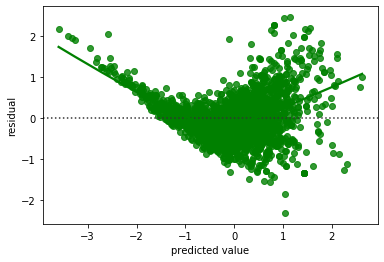

In [115]:
sns.residplot(predictions,(y_test-predictions),lowess=True,color='g')
plt.xlabel('predicted value')
plt.ylabel('residual')

### Statistics metrics

**RMSE** It is a frequently used measure of the differences between values (sample or population values) predicted by a model or an estimator and the values observed.

**MSE** It easily gets affected by outliers because outlier cases are amplified. Sometimes, Root Mean Squared Error is also used instead of MSE. RMSE has unit same as the independent valriable, while MSE is squared unit.

**MAE** Mean absolute errors does not amplify the outlier results and more robust.

**Coefficient of determination or  𝑅2** It is the measure of proportion of the variance in the dependent variable that is predictable from the independent variable(s).

In [116]:
# Comparing Train x Test metrics

# Train
pred_train_lin= lm.predict(X_train)

print('MAE_train:', metrics.mean_absolute_error(y_train, pred_train_lin))
print('MSE_train:', metrics.mean_squared_error(y_train, pred_train_lin))
print('RMSE_train:', np.sqrt(metrics.mean_squared_error(y_train, pred_train_lin)))

# Test

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

# R2 train vs test
print('R2_score_train:', metrics.r2_score(y_train,pred_train_lin))
print('R2 score:', metrics.r2_score(y_test,predictions))


MAE_train: 0.4113891548462479
MSE_train: 0.3036413356448462
RMSE_train: 0.5510366010029154
MAE: 0.41499224839597665
MSE: 0.30860916620617135
RMSE: 0.5555260265785675
R2_score_train: 0.6953322983799097
R2 score: 0.6937291230858151


In [37]:
# Actual vs Predicted values

error = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': predictions.flatten()})
error.head(10)

Actual Values  Predicted Values
0      -0.982210         -0.395663
1      -0.509532         -0.413610
2      -1.142245         -0.107273
3       2.170194          1.215214
4      -0.937544         -0.653014
5      -0.100129          0.108004
6      -1.384165         -1.153797
7       1.053641          0.564537
8      -0.621187         -0.788667
9       0.532584          0.390856

# Elastic net

In [38]:
# alpha = 0.01
model_enet = ElasticNet(alpha = 0.01)


# Fitting the model
model_enet.fit(X_train, y_train)

print("Training set score: {:.2f}".format(model_enet.score(X_train, y_train)))
print("Test set score: {:.2f}".format(model_enet.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(model_enet.coef_ != 0)))

Training set score: 0.69
Test set score: 0.69
Number of features used: 11


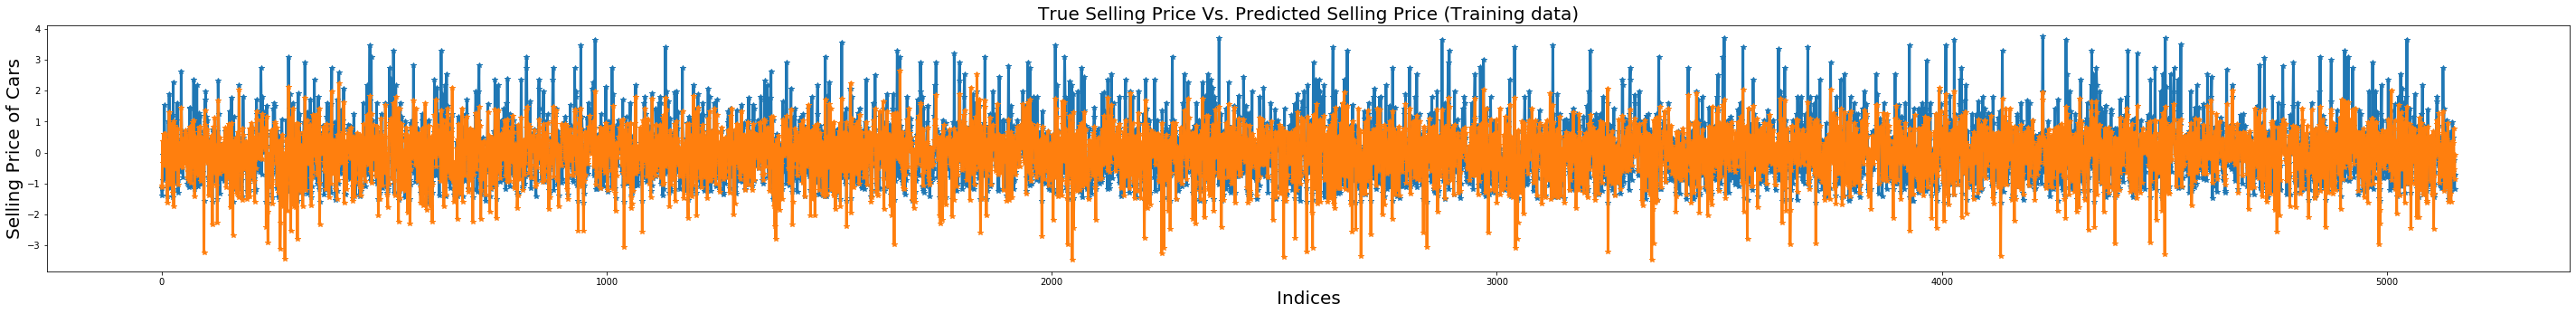

In [39]:
# For training data
plt.figure(figsize=(50, 5))
plt.plot(range(0, len(y_train)), y_train, label="TrueValues", marker="*", linewidth=3)
plt.plot(range(0, len(y_train)), model_enet.predict(X_train), label="PredictedValues", marker="*", linewidth=3)
plt.xlabel("Indices",fontsize=20)
plt.ylabel("Selling Price of Cars",fontsize=20)
plt.title("True Selling Price Vs. Predicted Selling Price (Training data)",fontsize=20)
plt.show()

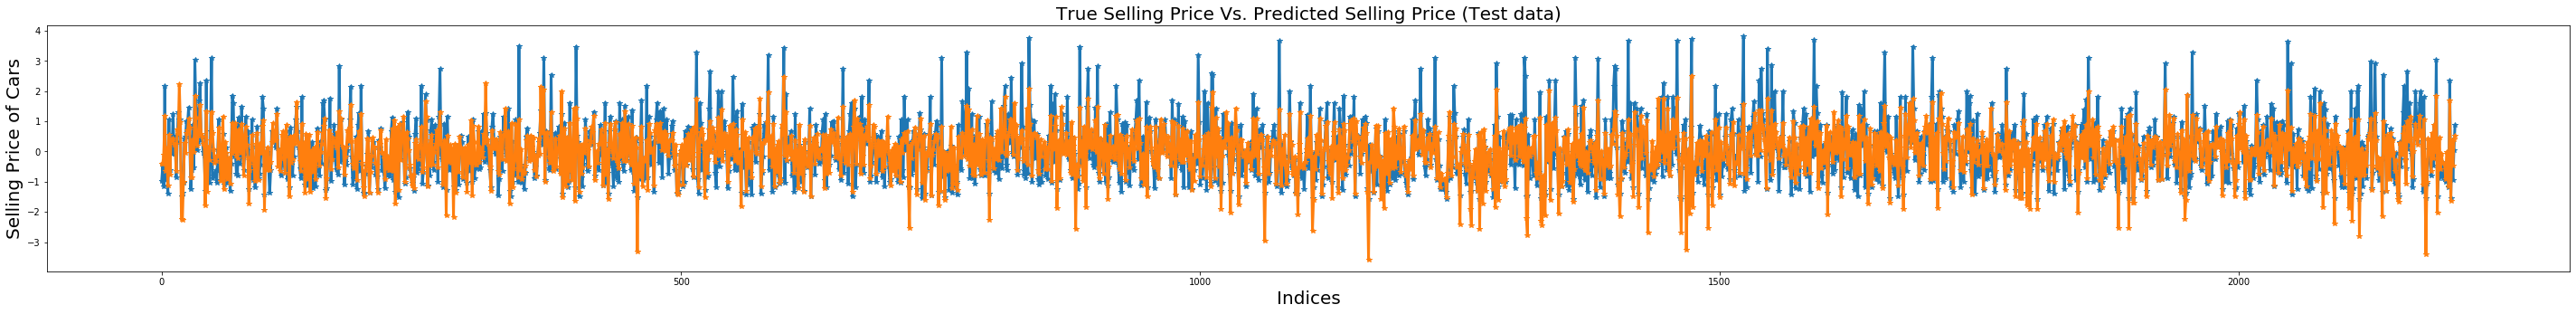

In [40]:
# For test data
plt.figure(figsize=(50, 5))
plt.plot(range(0, len(y_test)), y_test, label="TrueValues", marker="*", linewidth=3)
plt.plot(range(0, len(y_test)), model_enet.predict(X_test), label="PredictedValues", marker="*", linewidth=3)
plt.xlabel("Indices",fontsize=20)
plt.ylabel("Selling Price of Cars",fontsize=20)
plt.title("True Selling Price Vs. Predicted Selling Price (Test data)",fontsize=20)
plt.show()

In [41]:
# Train
pred_train_enet= model_enet.predict(X_train)

print('RMSE_train:', np.sqrt(metrics.mean_squared_error(y_train, pred_train_enet)))
print('MAE_train:', metrics.mean_absolute_error(y_train, pred_train_enet))
print("MSE_train:", np.sqrt(mean_squared_error(y_train,pred_train_enet)))


# Test
pred_test_enet= model_enet.predict(X_test)

print('RMSE_test:', np.sqrt(metrics.mean_squared_error(y_test, pred_test_enet)))
print('MAE_test:', metrics.mean_absolute_error(y_test, pred_test_enet))
print("MSE_test:", np.sqrt(mean_squared_error(y_test,pred_test_enet)))

# R2 train vs test
print("R2_score_train:", r2_score(y_train, pred_train_enet))
print("R2_Score_test:", model_enet.score(X_test, y_test)*100, "%")

RMSE_train: 0.5522788754069433
MAE_train: 0.412239175610021
MSE_train: 0.5522788754069433
RMSE_test: 0.5573638534554941
MAE_test: 0.4167919792358647
MSE_test: 0.5573638534554941
R2_score_train: 0.6939570448434654
R2_Score_test: 69.1699321102499 %


### y_test vs predictions

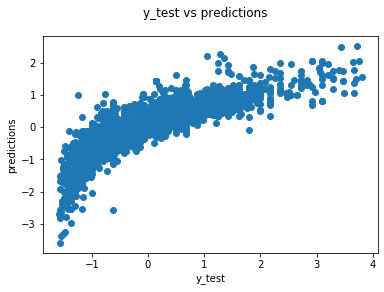

In [42]:
fig = plt.figure()
# Plot-label
fig.suptitle('y_test vs predictions')

#X-label
plt.xlabel('y_test')

# Y-label
plt.ylabel('predictions')
plt.scatter(y_test,pred_test_enet)

/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'residual')

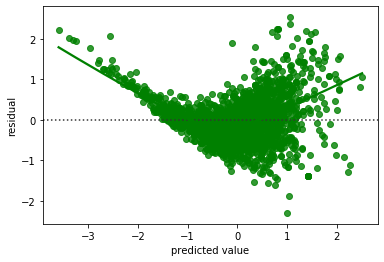

In [43]:
sns.residplot(pred_test_enet,(y_test-pred_test_enet),lowess=True,color='g')

plt.xlabel('predicted value')
plt.ylabel('residual')

/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Residual Analysis')

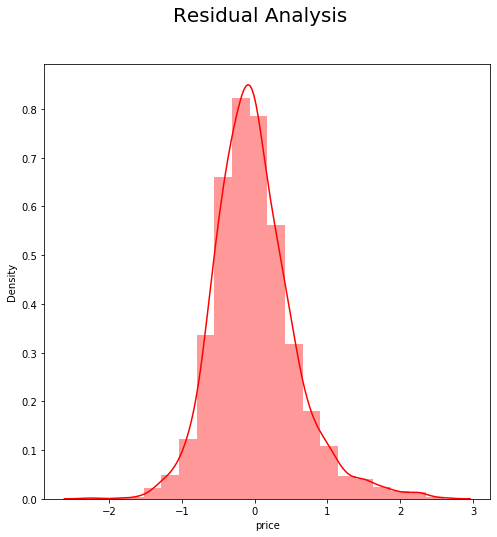

In [44]:
# Residual Analysis
# The normality assumption for linear regression applies to the errors

fig=plt.figure(figsize=(8,8))
  
sns.distplot(y_test-pred_test_enet, color='red',bins=20)

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)

# Scores summary Linear Regression vs Enet:

In [45]:
print("Linear Regression train Accuracy Score:", model.score(X_train, y_train)*100, "%")
print("Linear Regression test Accuracy Score:", model.score(X_test, y_test)*100, "%")
print("Enet train Accuracy Score:", model_enet.score(X_train, y_train)*100, "%")
print("Enet test Accuracy Score:", model_enet.score(X_test, y_test)*100, "%")

NameError: name 'model' is not defined

# XGBoost Regressor

XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. The algorithm differentiates itself in the following ways: A wide range of applications: Can be used to solve regression, classification, ranking, and user-defined prediction problems.

XGBoost is a popular and efficient open-source implementation of the gradient boosted trees algorithm. When using gradient boosting for regression, the weak learners are regression trees, and each regression tree maps an input data point to one of its leafs that contains a continuous score.

https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d#:~:text=XGBoost%20is%20a%20decision%2Dtree,uses%20a%20gradient%20boosting%20framework.&text=The%20algorithm%20differentiates%20itself%20in,and%20user%2Ddefined%20prediction%20problems.

https://hackernoon.com/want-a-complete-guide-for-xgboost-model-in-python-using-scikit-learn-sc11f31bq

In [51]:
# XGB Regressor
xgboost = XGBRegressor()

# Fitting the model
xgboost.fit(X_train, y_train)

# Making predictions
y_pred_xgb = xgboost.predict(X_test)
y_pred_xgb

[12:24:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([-0.7590462 , -0.5161476 , -0.49615878, ..., -0.9007194 ,
        0.16573933,  0.48087296], dtype=float32)

In [52]:
# Let's compare test result with actual
xgb_pred_dataset = pd.DataFrame({"Actual_Data": y_test, "Predict_Data": y_pred_xgb})
xgb_pred_dataset.head()

Actual_Data  Predict_Data
6819    -0.982210     -0.759046
2082    -0.509532     -0.516148
4750    -1.142245     -0.496159
5356     2.170194      1.476496
5834    -0.937544     -0.818335

In [53]:
# r2 Score of Train Model

xgboost.score(X_train, y_train)

0.879281306807686

In [54]:
# r2 Score of Test Model

r2_score(y_test, y_pred_xgb)

0.8656487185748128

In [55]:
cscore = cross_val_score(xgboost, X_train, y_train.ravel(), cv=5)
cscore.mean()

[12:24:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:24:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:24:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:24:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:24:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8603939647949517

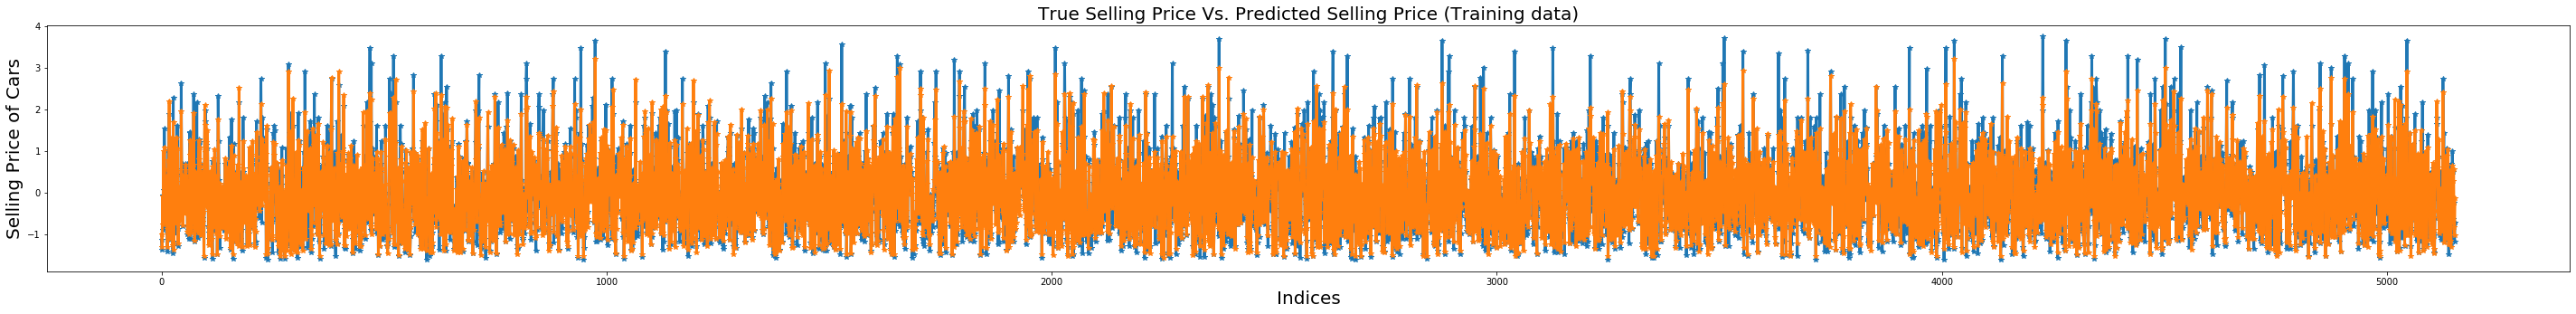

In [56]:
# For training data
plt.figure(figsize=(50, 5))
plt.plot(range(0, len(y_train)), y_train, label="TrueValues", marker="*", linewidth=3)
plt.plot(range(0, len(y_train)), xgboost.predict(X_train), label="PredictedValues", marker="*", linewidth=3)
plt.xlabel("Indices",fontsize=20)
plt.ylabel("Selling Price of Cars",fontsize=20)
plt.title("True Selling Price Vs. Predicted Selling Price (Training data)",fontsize=20)
plt.show()

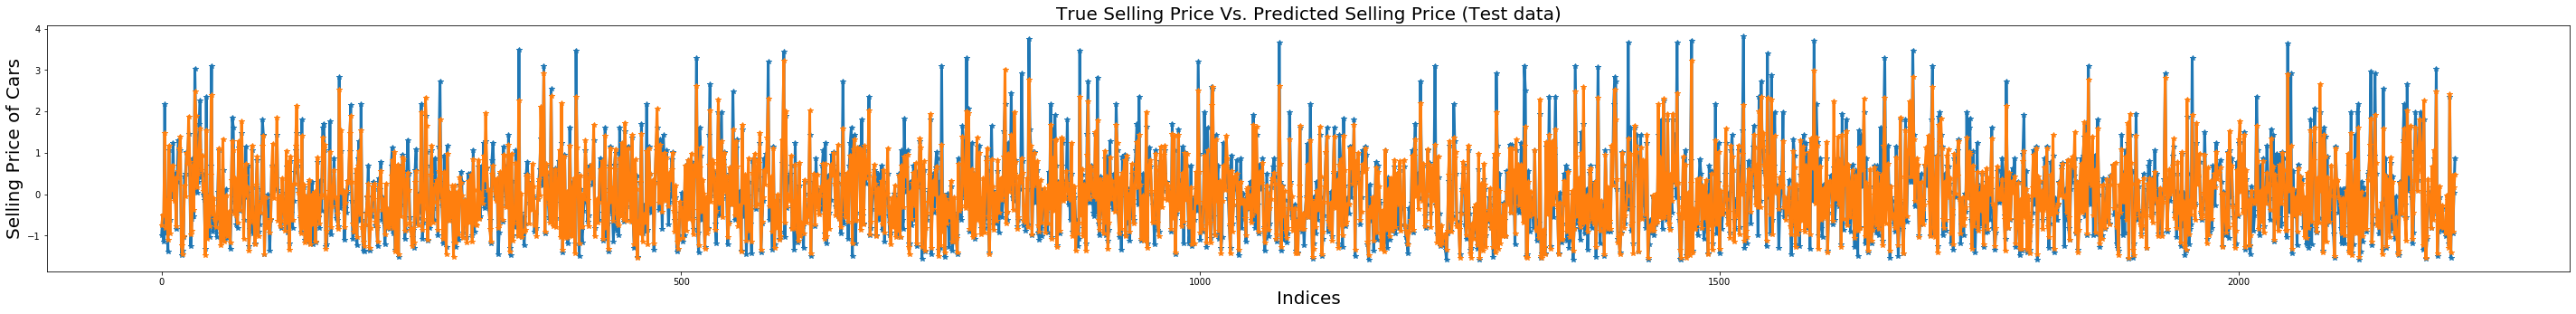

In [57]:
# For test data
plt.figure(figsize=(50, 5))
plt.plot(range(0, len(y_test)), y_test, label="TrueValues", marker="*", linewidth=3)
plt.plot(range(0, len(y_test)), xgboost.predict(X_test), label="PredictedValues", marker="*", linewidth=3)
plt.xlabel("Indices",fontsize=20)
plt.ylabel("Selling Price of Cars",fontsize=20)
plt.title("True Selling Price Vs. Predicted Selling Price (Test data)",fontsize=20)
plt.show()

In [58]:
# Train

pred_train_xg= xgboost.predict(X_train)


print('RMSE_train:', np.sqrt(metrics.mean_squared_error(y_train, pred_train_xg)))
print('MAE_train:', metrics.mean_absolute_error(y_train, pred_train_xg))
print("MSE_train:", np.sqrt(mean_squared_error(y_train,pred_train_xg)))

# Test

pred_test_xg= xgboost.predict(X_test)

print('RMSE_test:', np.sqrt(metrics.mean_squared_error(y_test, pred_test_xg)))
print('MAE_test:', metrics.mean_absolute_error(y_test, pred_test_xg))
print("MSE_test:", np.sqrt(mean_squared_error(y_test,pred_test_xg)))


# R2 train vs test

print("R2_score_train:", r2_score(y_train, pred_train_xg))

print("R2_Score:", r2_score(y_test, pred_test_xg)*100, "%")


RMSE_train: 0.34686022472350053
MAE_train: 0.2508251252679648
MSE_train: 0.34686022472350053
RMSE_test: 0.3679361554424565
MAE_test: 0.2678014179615065
MSE_test: 0.3679361554424565
R2_score_train: 0.879281306807686
R2_Score: 86.56487185748128 %


### y_test vs predictions

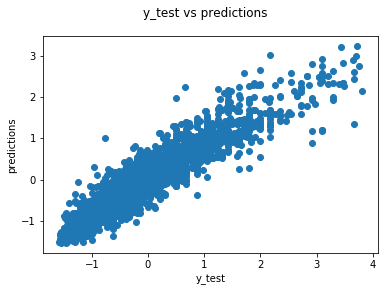

In [59]:
fig = plt.figure()
# Plot-label
fig.suptitle('y_test vs predictions')

#X-label
plt.xlabel('y_test')

# Y-label
plt.ylabel('predictions')
plt.scatter(y_test,pred_test_xg)

/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Residual Analysis')

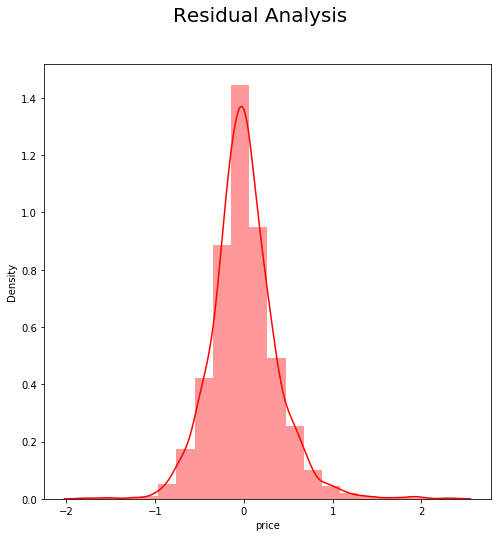

In [60]:
# Residual Analysis
# The normality assumption for linear regression applies to the errors

fig=plt.figure(figsize=(8,8))
  
sns.distplot(y_test-pred_test_xg, color='red',bins=20)

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)

/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'residual')

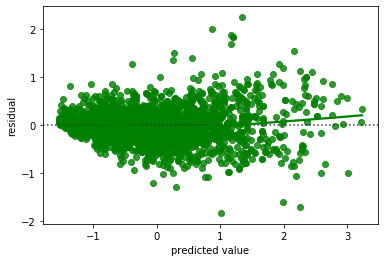

In [61]:


sns.residplot(pred_test_xg,(y_test-pred_test_xg),lowess=True,color='g')

plt.xlabel('predicted value')
plt.ylabel('residual')

# Gradient Boosting Regressor

Gradient Boosting for regression. GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#:~:text=Gradient%20Boosting%20for%20regression.,of%20the%20given%20loss%20function.

### Train test split for Gradient Boosting Regressor

### 10% and 20%

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=46)

params = {'n_estimators': 100,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

In [63]:
gradboost = GradientBoostingRegressor()
gradboost.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [64]:
y_pred = gradboost.predict(X_test)
y_pred

array([ 0.64754553, -1.06250225, -1.37689755, ...,  1.00430209,
       -0.77634214,  0.63970411])

In [65]:
gradboost.score(X_test, y_test)

0.8614284311703645

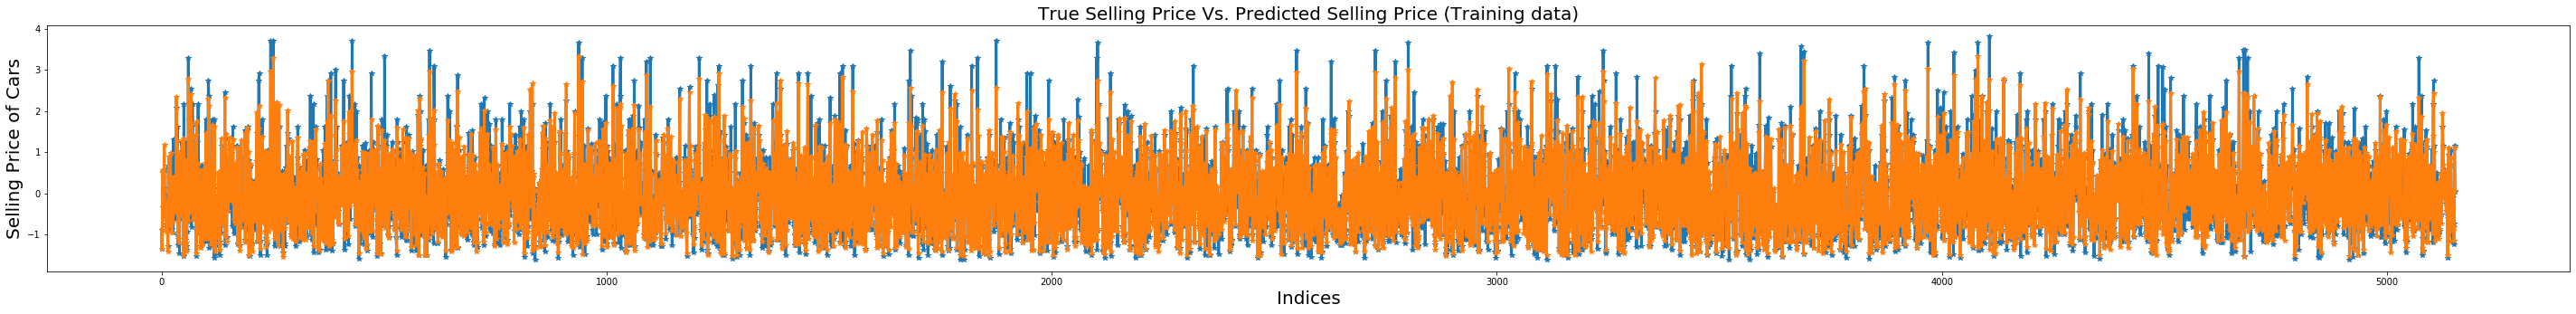

In [66]:
# For training data
plt.figure(figsize=(50, 5))
plt.plot(range(0, len(y_train)), y_train, label="TrueValues", marker="*", linewidth=3)
plt.plot(range(0, len(y_train)), gradboost.predict(X_train), label="PredictedValues", marker="*", linewidth=3)
plt.xlabel("Indices",fontsize=20)
plt.ylabel("Selling Price of Cars",fontsize=20)
plt.title("True Selling Price Vs. Predicted Selling Price (Training data)",fontsize=20)
plt.show()

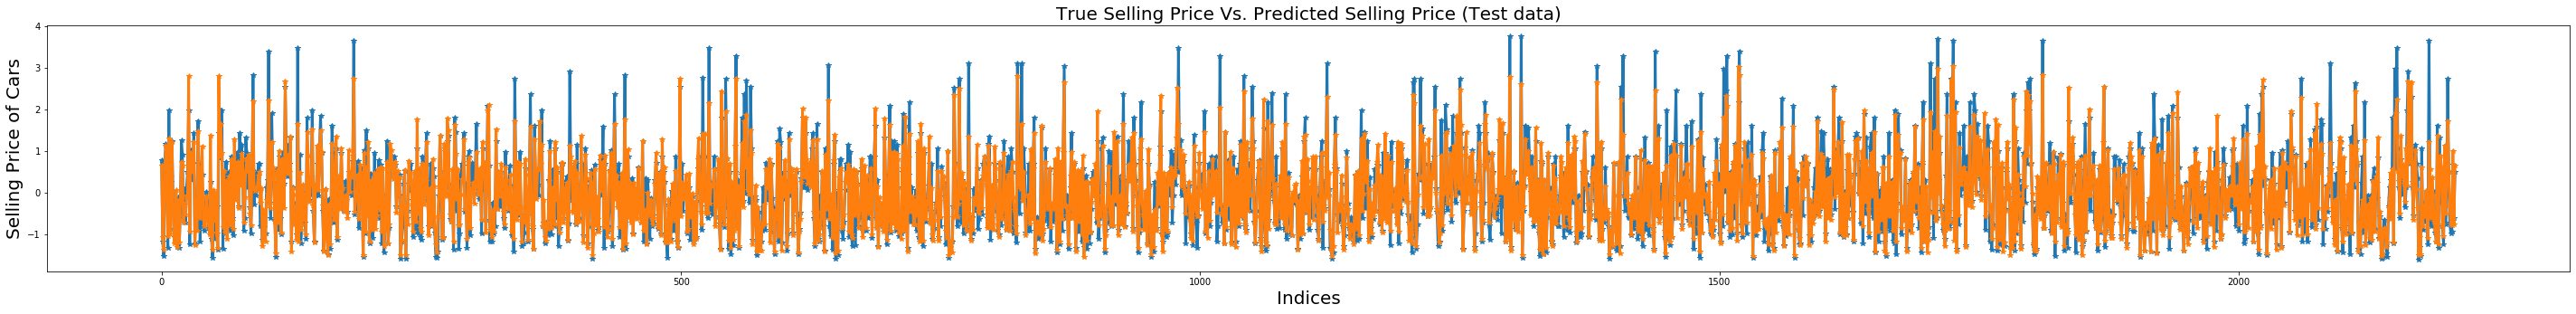

In [67]:
# For test data
plt.figure(figsize=(50, 5))
plt.plot(range(0, len(y_test)), y_test, label="TrueValues", marker="*", linewidth=3)
plt.plot(range(0, len(y_test)), gradboost.predict(X_test), label="PredictedValues", marker="*", linewidth=3)
plt.xlabel("Indices",fontsize=20)
plt.ylabel("Selling Price of Cars",fontsize=20)
plt.title("True Selling Price Vs. Predicted Selling Price (Test data)",fontsize=20)
plt.show()

In [68]:
# Train

pred_train_gra= gradboost.predict(X_train)


print('RMSE_train:', np.sqrt(metrics.mean_squared_error(y_train, pred_train_gra)))
print('MAE_train:', metrics.mean_absolute_error(y_train, pred_train_gra))
print("MSE_train:", np.sqrt(mean_squared_error(y_train,pred_train_gra)))

# Test

pred_test_gra= gradboost.predict(X_test)

print('RMSE_test:', np.sqrt(metrics.mean_squared_error(y_test, pred_test_gra)))
print('MAE_test:', metrics.mean_absolute_error(y_test, pred_test_gra))
print("MSE_test:", np.sqrt(mean_squared_error(y_test,pred_test_gra)))


# R2 train vs test

print("R2_score_train:", r2_score(y_train, pred_train_gra))

print("R2_Score:", r2_score(y_test, pred_test_gra)*100, "%")


RMSE_train: 0.3422912194937301
MAE_train: 0.2507739880676663
MSE_train: 0.3422912194937301
RMSE_test: 0.37431742606442686
MAE_test: 0.264293612940019
MSE_test: 0.37431742606442686
R2_score_train: 0.8822737589310338
R2_Score: 86.14284311703645 %


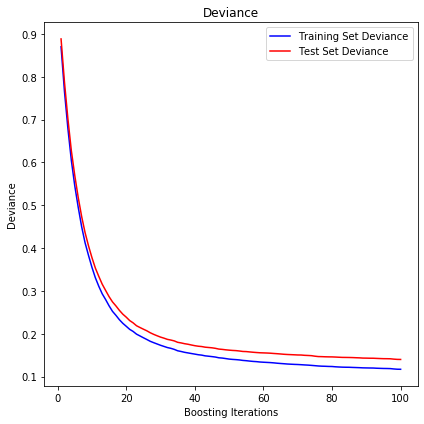

In [69]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(gradboost.staged_predict(X_test)):
    test_score[i] = gradboost.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, gradboost.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

### y_test vs predictions

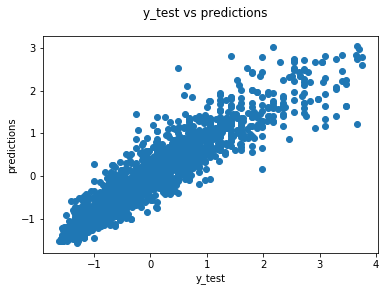

In [70]:
fig = plt.figure()
# Plot-label
fig.suptitle('y_test vs predictions')

#X-label
plt.xlabel('y_test')

# Y-label
plt.ylabel('predictions')
plt.scatter(y_test,pred_test_gra)

/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Residual Analysis')

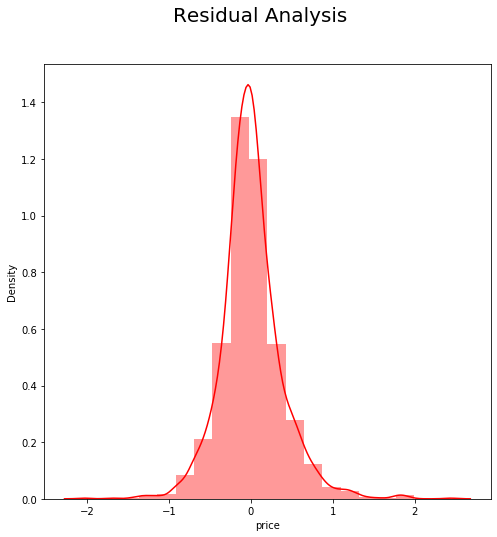

In [71]:
# Residual Analysis
# The normality assumption for linear regression applies to the errors

fig=plt.figure(figsize=(8,8))
  
sns.distplot(y_test-pred_test_gra, color='red',bins=20)

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)

/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'residual')

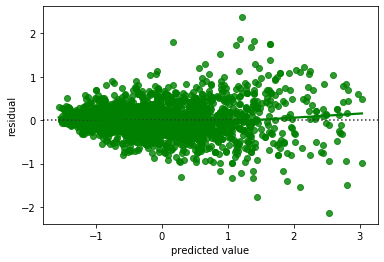

In [72]:
sns.residplot(pred_test_gra,(y_test-pred_test_gra),lowess=True,color='g')

plt.xlabel('predicted value')
plt.ylabel('residual')

### What's the difference between XGBoost vs Gradient Boosting? 

Gradient Boosting Machines vs. XGBoost.While regular gradient boosting uses the loss function of our base model (e.g. decision tree) as a proxy for minimizing the error of the overall model, XGBoost uses the 2nd order derivative as an approximation.

https://www.shirin-glander.de/2018/11/ml_basics_gbm/

# Random Forest

### Train test split for Random Forest Regressor

### 10% and 20%

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=46)

In [95]:
# create model and train the model with Random Forest Regressor
rforest = RandomForestRegressor(n_estimators=500)
rforest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [96]:
# Let's test the model
y_pred = rforest.predict(X_test)
y_pred

array([ 0.56566459, -1.04103214, -1.4469307 , ...,  0.97439376,
       -0.80650544,  0.46652093])

In [97]:
# Let's compare test result with actual
pred_dataset = pd.DataFrame({"Actual_Data": y_test, "Predict_Data": y_pred})
pred_dataset.head()

Actual_Data  Predict_Data
3131     0.774503      0.565665
3383    -1.179464     -1.041032
1196    -1.533039     -1.446931
3951     0.755894      0.704217
411      1.161575      1.161575

In [98]:
# Model score
rforest.score(X_train, y_train)

0.9840310357115909

In [99]:
# r2 Score of Model
R2Score = r2_score(y_test, y_pred)
R2Score

0.896133234635005

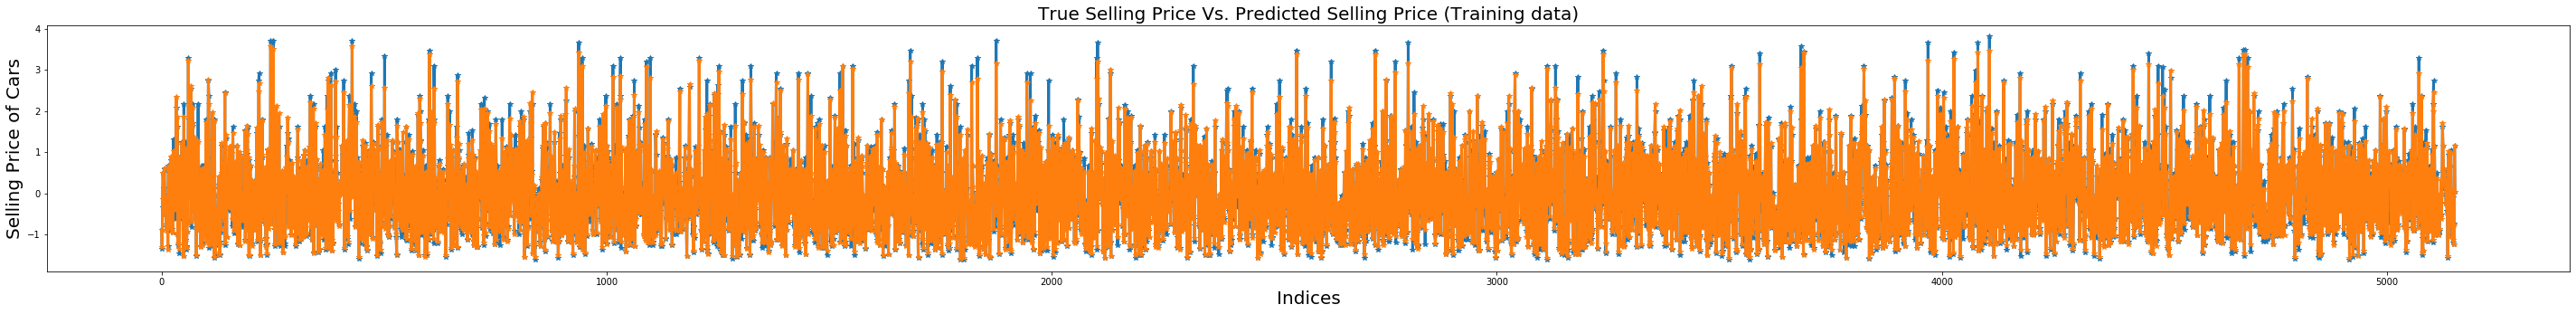

In [94]:
# For training data
plt.figure(figsize=(50, 5))
plt.plot(range(0, len(y_train)), y_train, label="TrueValues", marker="*", linewidth=3)
plt.plot(range(0, len(y_train)), rforest.predict(X_train), label="PredictedValues", marker="*", linewidth=3)
plt.xlabel("Indices",fontsize=20)
plt.ylabel("Selling Price of Cars",fontsize=20)
plt.title("True Selling Price Vs. Predicted Selling Price (Training data)",fontsize=20)
plt.show()

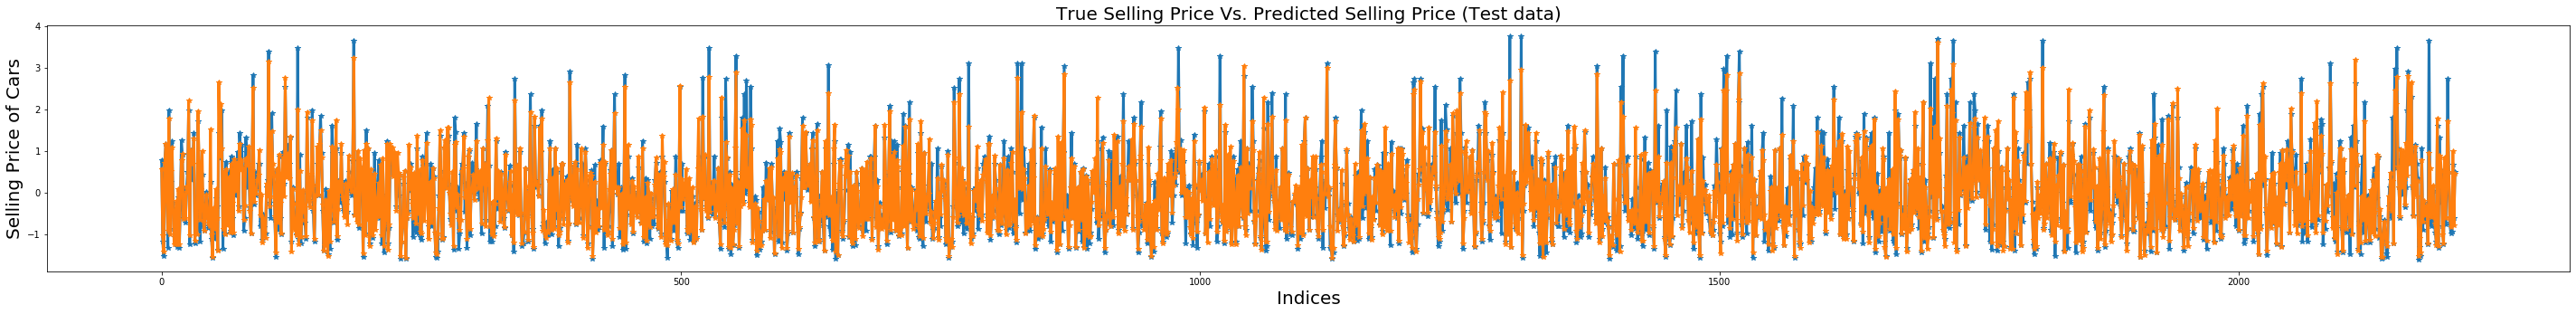

In [80]:
# For test data
plt.figure(figsize=(50, 5))
plt.plot(range(0, len(y_test)), y_test, label="TrueValues", marker="*", linewidth=3)
plt.plot(range(0, len(y_test)), rforest.predict(X_test), label="PredictedValues", marker="*", linewidth=3)
plt.xlabel("Indices",fontsize=20)
plt.ylabel("Selling Price of Cars",fontsize=20)
plt.title("True Selling Price Vs. Predicted Selling Price (Test data)",fontsize=20)
plt.show()

In [81]:
# Train

pred_train_rfor= rforest.predict(X_train)


print('RMSE_train:', np.sqrt(metrics.mean_squared_error(y_train, pred_train_rfor)))
print('MAE_train:', metrics.mean_absolute_error(y_train, pred_train_rfor))
print("MSE_train:", np.sqrt(mean_squared_error(y_train,pred_train_rfor)))

# Test

pred_test_refor= rforest.predict(X_test)

print('RMSE_test:', np.sqrt(metrics.mean_squared_error(y_test, pred_test_refor)))
print('MAE_test:', metrics.mean_absolute_error(y_test, pred_test_refor))
print("MSE_test:", np.sqrt(mean_squared_error(y_test,pred_test_refor)))


# R2 train vs test

print("R2_score_train:", r2_score(y_train, pred_train_rfor))

print("R2_Score:", r2_score(y_test, pred_test_refor)*100, "%")


RMSE_train: 0.12689507549157303
MAE_train: 0.08362502171514498
MSE_train: 0.12689507549157303
RMSE_test: 0.32543479836593436
MAE_test: 0.21379236699012616
MSE_test: 0.32543479836593436
R2_score_train: 0.9838202689962904
R2_Score: 89.5257720416357 %


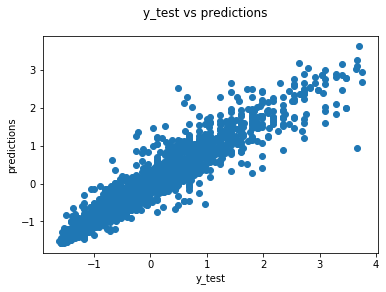

In [87]:
fig=plt.figure(figsize=(6,4))
# Plot-label
fig.suptitle('y_test vs predictions')

#X-label
plt.xlabel('y_test')

# Y-label
plt.ylabel('predictions')
plt.scatter(y_test,pred_test_refor)

/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Residual Analysis')

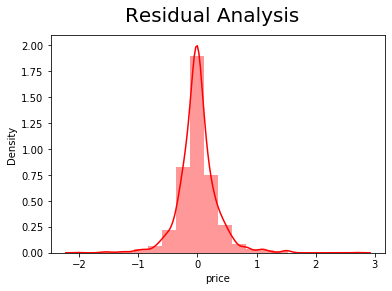

In [88]:
# Residual Analysis
# The normality assumption for linear regression applies to the errors

fig=plt.figure(figsize=(6,4))
  
sns.distplot(y_test-pred_test_refor, color='red',bins=20)

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)

/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'residual')

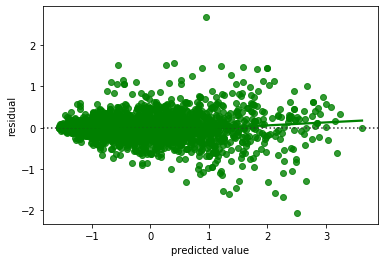

In [100]:

fig=plt.figure(figsize=(6,4))

sns.residplot(pred_test_refor,(y_test-pred_test_refor),lowess=True,color='g')

plt.xlabel('predicted value')
plt.ylabel('residual')

# Using statsmodels 

In [85]:
# OLS
import statsmodels.api as sm
res = sm.OLS(endog=y, exog=X).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.695
Model:                            OLS   Adj. R-squared (uncentered):              0.695
Method:                 Least Squares   F-statistic:                              1197.
Date:                Sun, 29 Nov 2020   Prob (F-statistic):                        0.00
Time:                        12:25:19   Log-Likelihood:                         -6073.9
No. Observations:                7363   AIC:                                  1.218e+04
Df Residuals:                    7349   BIC:                                  1.227e+04
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
km_driven                  -0.0738      0.008     -9.635      0.000      -0.089      -0.059
mileage                    -0.0006      0.002     -0.244      0.807      -0.005       0.004
engine                      0.1058      0.014      7.632      0.000       0.079       0.133
max_power                   0.3816      0.009     40.810      0.000       0.363       0.400
seats                       0.0434      0.010      4.383      0.000       0.024       0.063
car_age                    -0.5031      0.009    -56.949      0.000      -0.520      -0.486
seller_type_Individual     -0.1175      0.020     -6.011      0.000      -0.156      -0.079
fuel_Diesel                 0.4123      0.055      7.560      0.000       0.305       0.519
fuel_LPG                    0.2971      0.104      2.854      0.004       0.093       0.501
fuel_Petrol                 0.1114      0.046      2.401      0.016       0.020       0.202
transmission_Manual        -0.2837      0.026    -11.046      0.000      -0.334      -0.233
owner_First_Owner           0.1592      0.025      6.414      0.000       0.111       0.208
owner_Second_Owner          0.0103      0.025      0.416      0.678      -0.038       0.059
car_brand_International     0.0006      0.014      0.041      0.967      -0.027       0.028
==============================================================================
Omnibus:                      981.896   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2355.874
Skew:                           0.772   Prob(JB):                         0.00
Kurtosis:                       5.302   Cond. No.                         346.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# All models R2

In [86]:
# Scores summary:
print('Linear Regression R2 score:', -metrics.r2_score(y_test,predictions)*100, "%")
print("Elastic Net R2_Score_test:", model_enet.score(X_test, y_test)*100, "%")
print("XGBoosting R2_Score:", -r2_score(y_test, pred_test_xg)*100, "%")
print("Gradient Boosting R2_Score:", r2_score(y_test, pred_test_gra)*100, "%")
print("Random Forest R2_Score:", r2_score(y_test, pred_test_refor)*100, "%")

Linear Regression R2 score: 64.115373120995 %
Elastic Net R2_Score_test: 67.47329493118382 %
XGBoosting R2_Score: 75.86752887175918 %
Gradient Boosting R2_Score: 86.14284311703645 %
Random Forest R2_Score: 89.5257720416357 %
